In [1]:
# Required libraries

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np

Machine Learning:
"Machine learning (ML) is a branch of artificial intelligence (AI) and computer science that focuses on the using data and algorithms to enable AI to imitate the way that humans learn, gradually improving its accuracy."

https://www.ibm.com/topics/machine-learning

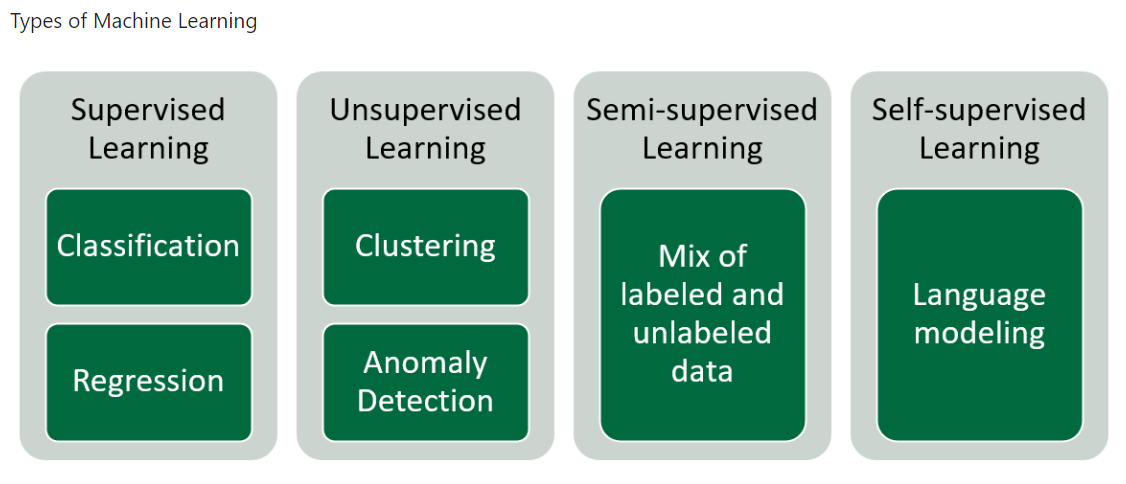

This image is taken from Gentle Introduction to Machine Learning, Dartmouth Research Computing

Here we go over an example of Clustering

In [2]:
from sklearn.cluster import KMeans




Types of Clustering

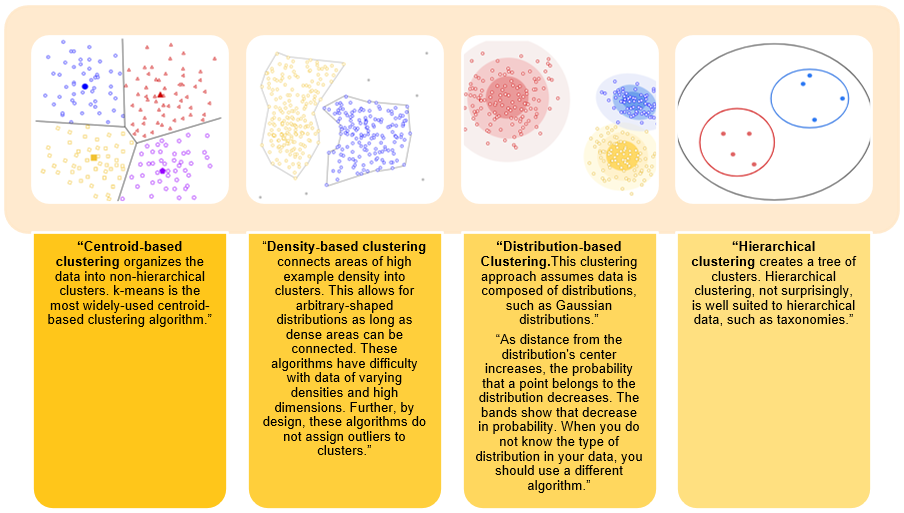



Here we use:


"The KMeans algorithm clusters data by trying to separate samples in n groups of equal variance, minimizing a criterion known as the inertia or within-cluster sum-of-squares (see below). This algorithm requires the number of clusters to be specified."

K-Means:

An exmaple of Unsupervised Learning.

What does it do ?
“Iteratively determines the best k center points (known as centroids).
Assigns each example to the closest centroid. Those examples nearest the same centroid belong to the same group.
The k-means algorithm picks centroid locations to minimize the cumulative square of the distances from each example to its closest centroid”
The algorithm generally lets you choose a k- value. If k=3, then 3 is the number of centroids the algorithm determines.






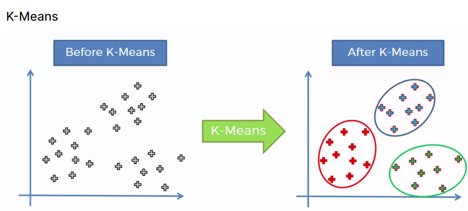

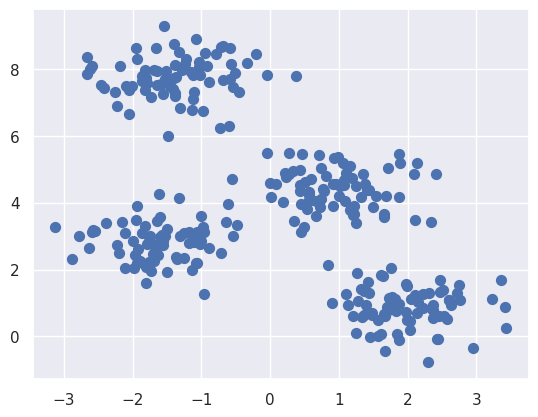

In [3]:
# from https://stackoverflow.com/questions/65898399/no-module-named-sklearn-datasets-samples-generator
from sklearn.datasets import make_blobs
#Create blobs or groups of data
X, y = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
#cluster_std= The standard deviation of the clusters.
#random_state is the seed used by the random number generator from https://scikit-learn.org/0.15/modules/generated/sklearn.datasets.make_blobs.html
plt.scatter(X[:, 0], X[:, 1], s=50);
#s=size of the points

In [4]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
#fit is used for the dataset that needs to be clustered
y_kmeans = kmeans.predict(X)
#Compute cluster centers and predict cluster index for each sample.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


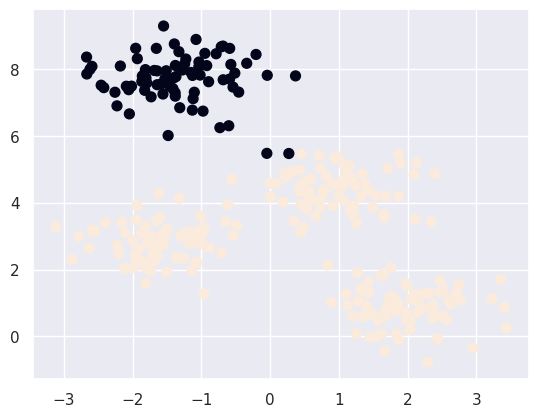

In [5]:
plt.scatter(X[:, 0], X[:, 1], c=kmeans.predict(X),
            s=50);

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


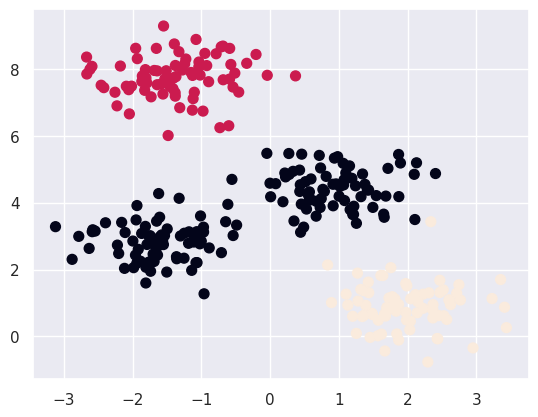

In [6]:
#Let's try 3 clusters
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
#fit is used for the dataset that needs to be clustered
y_kmeans = kmeans.predict(X)
#Compute cluster centers and predict cluster index for each sample.

plt.scatter(X[:, 0], X[:, 1], c=kmeans.predict(X),
            s=50);

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


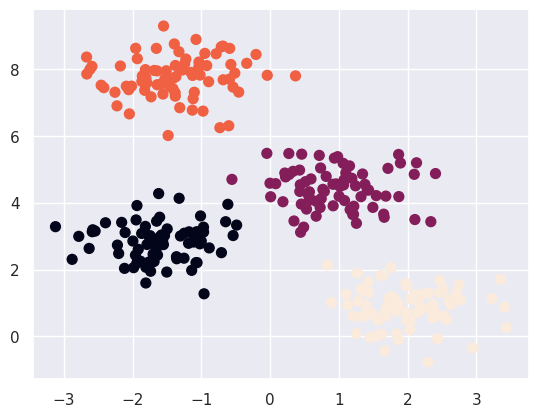

In [7]:
#Let's try 4 clusters
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
#fit is used for the dataset that needs to be clustered
y_kmeans = kmeans.predict(X)
#Compute cluster centers and predict cluster index for each sample.

plt.scatter(X[:, 0], X[:, 1], c=kmeans.predict(X),
            s=50);


How do you choose the number of clusters ?

In this example you can see that there are 4 clusters. In others, where you can't. You use the Elbow Method to calculate the number of clusters required.

“For each value of K, we are calculating WCSS (Within-Cluster Sum of Square). WCSS is the sum of the squared distance between each point and the centroid in a cluster. When we plot the WCSS with the K value, the plot looks like an Elbow.”

The lowest value is taken as the optimal. Example from the  code, is 4.


https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html


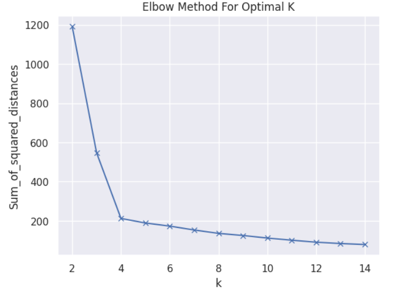

In [8]:
# Elbow Method

In [9]:
Sum_of_squared_distances = []
K = range(2, 15)
#fromhttps://medium.com/pursuitnotes/k-means-clustering-model-in-6-steps-with-python-35b532cfa8ad:
#this loop will fit the k-means algorithm to our data and
#second we will compute the within cluster sum of squares and #appended to our Sum_of_squared_distances list.
#init parameter is the random #initialization method
#we select kmeans++ method. max_iter parameter the maximum number of iterations there can be to
#find the final clusters when the K-meands algorithm is running.
for k in K:
  km = KMeans(n_clusters = k, max_iter = 200, n_init = 10)
  #the next parameter is n_init which is the number of times the #K_means algorithm will be run with
#different initial centroid.
  km = km.fit(X)
  #kmeans algorithm fits to the X dataset
  Sum_of_squared_distances.append(km.inertia_)
  #kmeans inertia_ attribute is:  Sum of squared distances of samples to their closest cluster center.


Text(0.5, 1.0, 'Elbow Method For Optimal K')

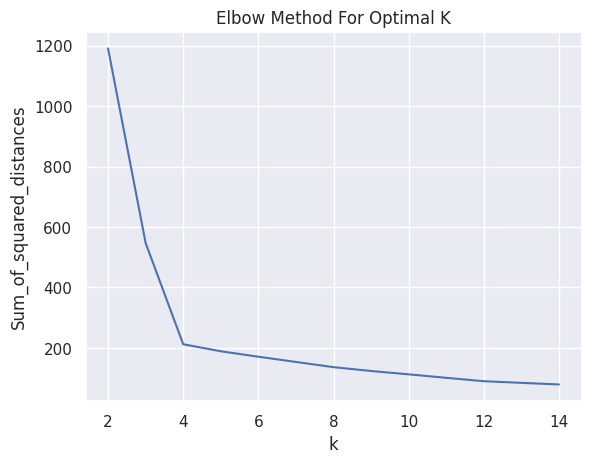

In [10]:
plt.plot(K, Sum_of_squared_distances)
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal K')

# The elbow , is chosen as the optimal K.

MORE Details:
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
https://scikit-learn.org/stable/modules/clustering.html